<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
using LinearAlgebra, Random, PyPlot

In [2]:
"""
    A = sbm(n, p, q)

The adjacency matrix of a random graph with 2n vertices,
divided into groups 1:n and n+(1:n).
The probability of edges inside groups is p, and between groups is q.
"""
function sbm(n::Int, p, q)
    J = ones(n,n)
    A = triu([p*J q*J; q*J p*J],1)
    M = Float64.(rand(2n,2n) .< A)
    M = M + M'
end

sbm

In [3]:
Random.seed!(1)
sbm(3,0.99,0.01)

6×6 Array{Float64,2}:
 0.0  1.0  1.0  0.0  0.0  0.0
 1.0  0.0  1.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0
 0.0  0.0  0.0  1.0  1.0  0.0

If p and q are far enough apart, you can see the clusters when we make them consecutive.  In the following plot we show the adjacency matrix, with black dots representing edges.

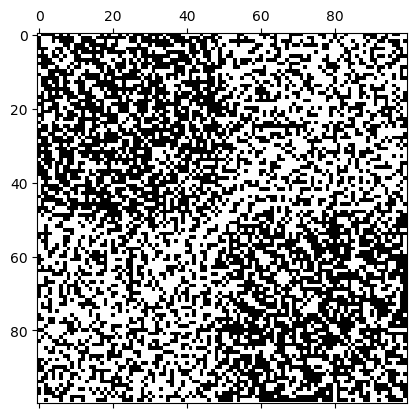

PyObject <matplotlib.image.AxesImage object at 0x12549b438>

In [4]:
n = 50
p = 0.6
q = 0.4
M = sbm(n, p, q)
spy(M)

But, you can't see them if they are scrambled.

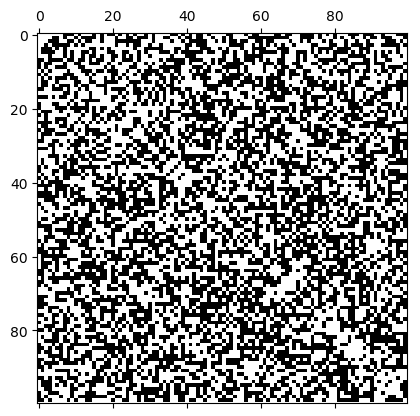

PyObject <matplotlib.image.AxesImage object at 0x1419078d0>

In [5]:
perm = randperm(2n)
spy(M[perm,perm])

In [6]:
E = eigen(M)

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
100-element Array{Float64,1}:
 -10.136494168869309 
  -9.12080028703322  
  -8.901380218009017 
  -8.679486963470039 
  -8.292549671724334 
  -8.24680761903311  
  -8.017617660921616 
  -7.815571764240469 
  -7.595083993865632 
  -7.11680440762432  
  -6.8893932436010985
  -6.859611625705885 
  -6.539046018957024 
   ⋮                 
   5.961714287046954 
   6.177373721633428 
   6.3633349332884155
   6.503647122363569 
   6.888045483531366 
   7.249601347221679 
   7.375326755815957 
   7.822867955212095 
   8.543779693628506 
   8.74875907106214  
  13.076475697839525 
  49.60517209122324  
eigenvectors:
100×100 Array{Float64,2}:
 -0.0906587   0.024643    -0.0899096  …   0.0456157   0.0257771   -0.09302  
 -0.0508962   0.0345615    0.0523993     -0.0398236   0.18376     -0.106066 
 -0.012801   -0.0223074    0.0823133      0.0860471   0.0771821   -0.110036 
  0.029748    0.146399    -0.0825061     -0.182154    0.0

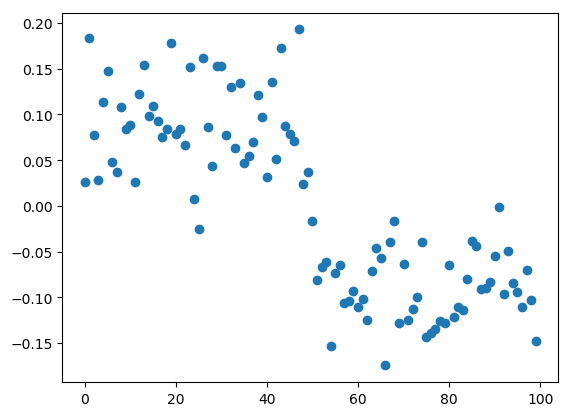

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x14094c5f8>

In [7]:
psi2 = E.vectors[:,end-1]
psi2 = sign(sum(psi2[1:n]))*psi2
plot(psi2, linestyle="none", marker="o")

In [8]:
# compute the number misclassified in each group
sum(psi2[1:n] .< 0), sum(psi2[(n+1):2n] .> 0)

(1, 0)

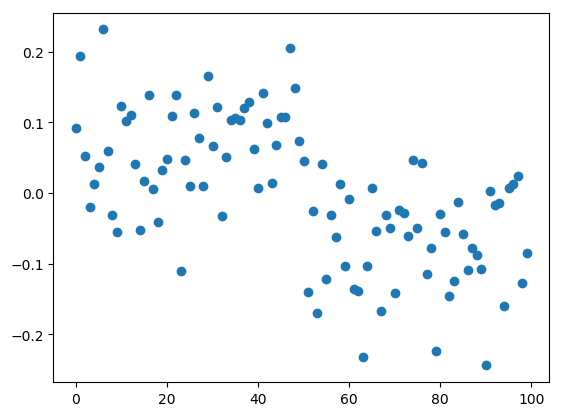

(7, 10)

In [9]:
p = 0.5
q = 0.4
M = sbm(n, p, q)
E = eigen(M)
psi2 = E.vectors[:,end-1]
psi2 = sign(sum(psi2[1:n]))*psi2
plot(psi2, linestyle="none", marker="o")

# compute the number misclassified in each group
sum(psi2[1:n] .< 0), sum(psi2[(n+1):2n] .> 0)